# TMA4215 - Assignment 4 - The trapezoidal method

**Deadline:** Wednesday October 7, 11:59PM

**For approval:** Upload a Jupyter Notebook in Blackboard with code/answers. Answer Control questions in Blackboard.

**Problem 1.**

The Trapezoidal method for problems $y'=f(y)$ can be written in the form

$$
    u_{n+1} = u_n + \frac{h}{2}(f(u_n)+f(u_{n+1}))
$$

**(a)** Show how this method belongs both to the class of Runge-Kutta methods and the class of linear multistep methods, just by writing it down in the multistep format and give its Butcher tableaux as a Runge-Kutta method.

**(b)** Use the multistep format to derive an expression for the local truncation error of this method (it is sufficient to give the principal term). What is the order of this method?

**Control question 1.** what is the order of the method.

**Control question 2.** What is $a_{2,2}$ in the Butcher tableaux.

**(c)** Consider again the trapezoidal method above. Assume that $f$ has a Lipschitz constant $L$. We denote as usual the sequence of computed approximations by $u_1, u_2,\ldots$. At some grid point, $t=t_n$,
let the exact solution be $y(t_n)=y_n$ and assume that the trapezoidal rule applied to the starting value $y_n$ would result in an approximation $w_{n+1}$ at $t_{n+1}$. The difference $y_{n+1}-w_{n+1}$ is the local error and we assume that $\|y_{n+1}-w_{n+1}\|\leq Mh^{p+1}$ for a constant $M>0$ and a positive integer $p$.
Clearly we can write for the global error at $t_{n+1}$

$$
E_{n+1} := y_{n+1}-u_{n+1}= (y_{n+1}-w_{n+1})+(w_{n+1}-u_{n+1}) = \text{loc.err.} + (w_{n+1}-u_{n+1})
$$

Let us focus on the second term of the right hand side, show that

$$
\|w_{n+1}-u_{n+1}\| \leq \frac{1+\frac12 hL}{1-\frac12 hL} \|E_n\|
$$

Use this result to derive a bound for the global error $E_n$ at $t=t_n$ as a function of $h$, $L$, and $M$ for the trapzoidal rule.


# 1a)

Multistep format:
$$
    u_{n+1} - u_n= + h(\frac{1}{2}f(u_n) + \frac{1}{2}f(u_{n+1}))
    \alpha_0 u_{n+1} + \alpha_1 u_n= + h(\beta_0 f(u_n) + \beta_0 f(u_{n+1}))
$$
where 
$$
    \alpha_0 = 1, \alpha_1 = -1, \beta_0 = \beta_1 = \frac{1}{2}
$$

The Butcher tablux is:
<table>
    <tr>
        <th>
            0
        </th>
        <th>
            0
        </th>
        <th>
            0
        </th>
    </tr>
    <tr>
        <th>
            1
        </th>
        <th>
            $\frac{1}{2}$
        </th>
        <th>
            $\frac{1}{2}$
        </th>
    </tr>
    <tr>
        <th>
            -
        </th>
        <th>
            $\frac{1}{2}$
        </th>
        <th>
            $\frac{1}{2}$
        </th>
</table>

# 1b)

local truncation error:
$$
    e_k = y_k - u_k = y_k - ( u_k + \frac{h}{2}(f(u_{k-1})+f(u_{k}))) 
$$

Suppose inputvalues are exact: $u_j = y_j$ , for all $j = 0, 1, ... , k-1$ 
Taylor expansion of $y_k$ and $f(y_k)$:

$$
    y_k = y_{k-1} + h y'_{k-1} + \frac{h^2}{2}y''_{k-1} + O(h^3) \\
    f(u_k) = u'_{k} = u'_{k-1} + h u''_{k-1} + O(h^2)
$$

inserting these functions in the local truncation error:

$$
    e_k = y_{k-1} + h y'_{k-1} + \frac{h^2}{2}y''_{k-1} + O(h^3) - u_k + \frac{h}{2}(f(u_{k-1}) + u'_{k-1} + h u''_{k-1} + O(h^2)) = O(h^3)
$$

The order of this method is 3

# 1c)

Proof: .....

Bound for the global error:

$$
\|w_{n+1}-u_{n+1}\| \leq \frac{1+\frac12 hL}{1-\frac12 hL} \|E_n\| \\
\|y_{n+1} - w_{n+1}\| \leq Mh^{p+1}
$$

$$
\Rightarrow \|E_{n+1}\| = \|y_{n+1} - w_{n+1}\| + \|w_{n+1} - u_{n+1}\| \leq Mh^{p+1} + \frac{1+\frac12 hL}{1-\frac12 hL} \|E_n\|
$$

**Problem 2.**

Consider the nonlinear pendulum problem

$$
\ddot{q} = - \sin q
$$

where $\ddot{q}=\frac{d^2q}{dt^2}$ (and similarly $\dot{q}=\frac{dq}{dt}$ etc).
Rewritten as a first order system

\begin{align*}
   \dot{q} &= p \\
   \dot{p} &= -\sin q
\end{align*}

You should now compare two methods applied to this problem, the first one is the Euler method.

\begin{align*}
q_{n+1} &= q_n + h p_n \\
p_{n+1} &= p_n - h \sin q_n
\end{align*}

The second is the symplectic Euler method

\begin{align*}
q_{n+1} &= q_n + h p_n \\
p_{n+1} &= p_n - h \sin q_{n+1}
\end{align*}

Write some python code which does the following (need not be general functions, the main goal is now just to produce two plots as specified below for the pendulum problem)

1. With intial values $q_0=1, p_0=0$, implement $N$ steps of both the Euler and symplectic Euler methods that takes you from $t=0$ to $t=T$ with stepsize $h$. Assume $T$ and $N$ specified, and set $h=T/N$. Store the whole history of approximations $(q_n,p_n),\ n=0,\ldots,N$ in a $(2,N)$ numpy array.
2. Run an experiment with $N=1000$ and $T=30$ (both methods).
3. Make two phase plots, i.e. plot $p_n$ vs $q_n$, for each of the two methods. Draw them as continuous lines and plot the initial point as a circle (or bullet).

**Control question 3.** For the Euler method, does the method produce (a) a closed curve (b) a curve that spirals inwards (decreasing radius) or (c) a curve that spirals outwards (increasing radius)


**Control question 4.** For the symplectic Euler method, does the method produce (a) a closed curve (b) a curve that spirals inwards (decreasing radius) or (c) a curve that spirals outwards (increasing radius)


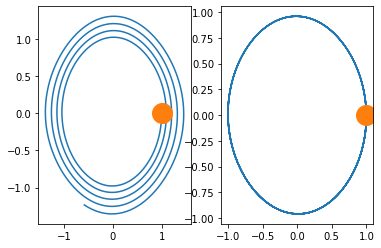

In [8]:
import numpy as np
import matplotlib.pyplot as plt
N=1000
T=30
h=T/N
q0=1
p0=0

'''Fill in the rest here, it is allowed not to write separate functions, but do as you prefer'''
def Euler(q0, p0, h):
    q = q0 + h*p0
    p = p0 - h*np.sin(q0)
    return q,p

def sympectic_Euler(q0,p0, h):
    q = q0 + h * p0
    p = p0 - h * np.sin(q)
    return q,p


qp1 = np.zeros([2, N])
qp1[0, 0] = q0
qp2 = qp1.copy()
for i in range(1,N):
    qp1[:,i] = Euler(qp1[0,i-1], qp1[1,i-1], h)
    qp2[:,i] = sympectic_Euler(qp2[0,i-1], qp2[1,i-1], h)


plt.figure()
plt.subplot(121)
plt.plot(qp1[0,:],qp1[1,:])
plt.plot(qp1[0,0],qp1[1,0], 'o', markersize = 20)
plt.subplot(122)
plt.plot(qp2[0,:],qp2[1,:])
plt.plot(qp2[0,0],qp2[1,0], 'o', markersize = 20)
plt.show()